In [1]:
!pip install pandas numpy matplotlib seaborn



Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Order Hour              1000 non-null   int32    

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


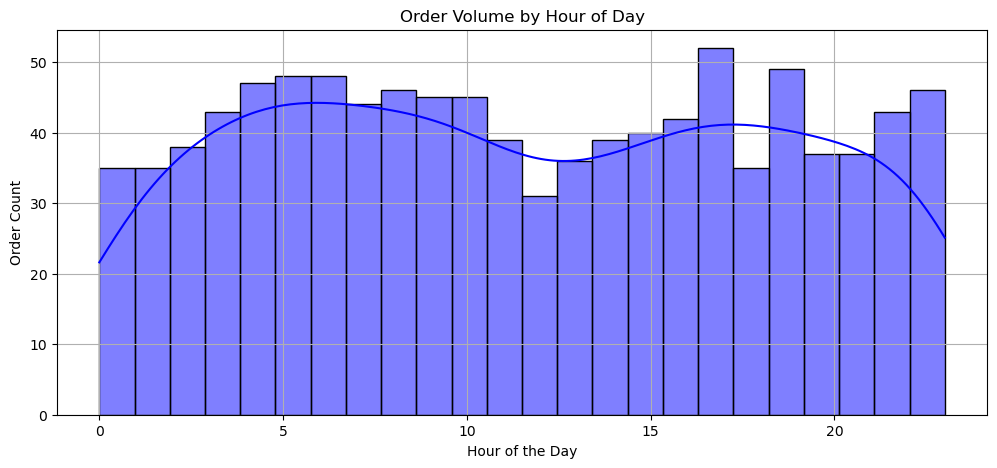

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


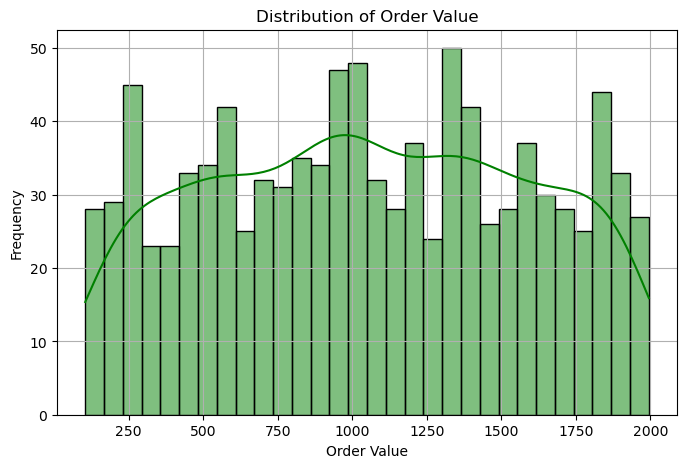

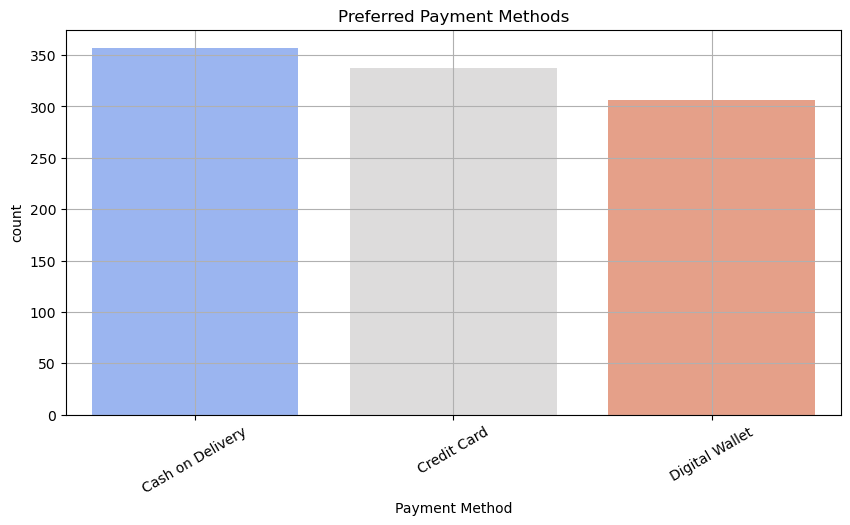

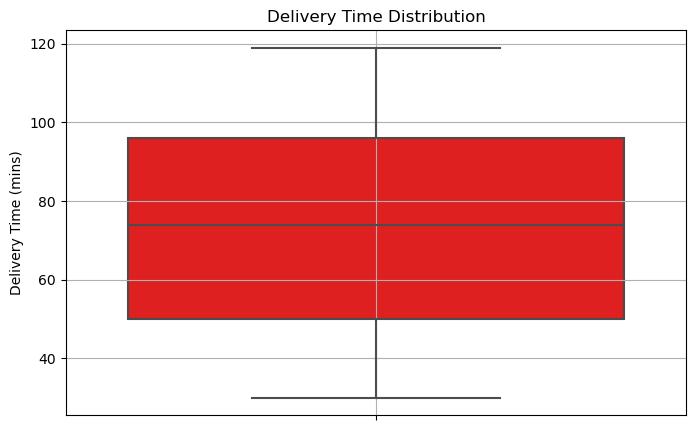

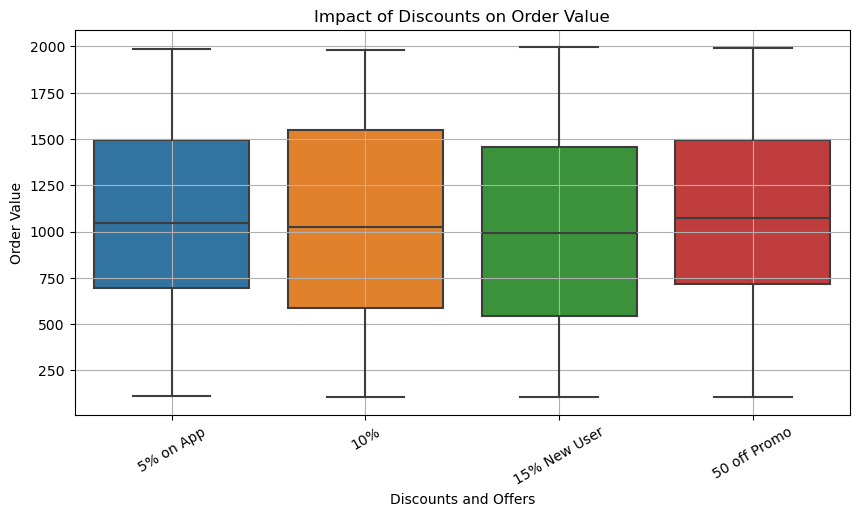

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "food_orders_new_delhi.csv"
df = pd.read_csv(file_path)

# Convert datetime columns
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])

# Create new features
df["Order Hour"] = df["Order Date and Time"].dt.hour
df["Delivery Time (mins)"] = (df["Delivery Date and Time"] - df["Order Date and Time"]).dt.total_seconds() / 60

# Summary Statistics
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# 1️⃣ Order Distribution Over Time
plt.figure(figsize=(12, 5))
sns.histplot(df["Order Hour"], bins=24, kde=True, color="blue")
plt.title("Order Volume by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Order Count")
plt.grid()
plt.show()

# 2️⃣ Order Value Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Order Value"], bins=30, kde=True, color="green")
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 3️⃣ Payment Method Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Payment Method", order=df["Payment Method"].value_counts().index, palette="coolwarm")
plt.title("Preferred Payment Methods")
plt.xticks(rotation=30)
plt.grid()
plt.show()

# 4️⃣ Delivery Time Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Delivery Time (mins)"], color="red")
plt.title("Delivery Time Distribution")
plt.ylabel("Delivery Time (mins)")
plt.grid()
plt.show()

# 5️⃣ Discounts and Order Value Relationship
plt.figure(figsize=(10, 5))
sns.boxplot(x="Discounts and Offers", y="Order Value", data=df)
plt.xticks(rotation=30)
plt.title("Impact of Discounts on Order Value")
plt.grid()
plt.show()
